### Zaawansowana klasyfikacja

Wykorzystajmy zestaw danych, który ma trochę bardziej złożone cechy - zarówno ciągłe jak i kategoryczne. Jest to zestaw danych bazujący na spisie ludności. Podane są różne dane socjometryczne i jedna zmienna binarna - czy przychody są większe niż $50K.

Plik: `income_evaluation.csv`
Więcej na: https://www.kaggle.com/uciml/adult-census-income

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data sets - https://docs.python.org/3/library/re.html
df = pd.read_csv("./data/income_evaluation.csv", sep='\s*,\s*', header=0, encoding='ascii', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [4]:
?pd.read_csv

In [5]:
# Czy "fnlwgt" przyczyni się do poprawy jakości modelu
#fnlwgt - https://www.kaggle.com/uciml/adult-census-income/discussion/32698

df.fnlwgt.count(), df.fnlwgt.nunique()

(32561, 21648)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


b. Konwersja danych kategorycznych do numerycznych 
`sklearn.preprocessing.LabelEncoder`

In [7]:
#encoding categorical to numeric
from sklearn.preprocessing import LabelEncoder

list_to_encode = [
    'workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'native-country'
]

df_encoded = pd.get_dummies(df, columns=list_to_encode)
df_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
list(df_encoded.columns)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupatio

c. Wybór cech oraz wyjścia modelu

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df_encoded['income'])
x = df_encoded.drop(['income'], axis=1)

In [10]:
sum(y)/len(y)

0.2408095574460244

`xgboost` zawiera specyficzną strukturę danych, której używa wewnętrznie do treningu. Jest ona zoptymalizowana pod wykorzystanie w tym pakiecie.

In [11]:
data_dm = xgb.DMatrix(data=x.values, label=y)

In [12]:
data_dm

train - przygotowujemy model               ------ cv


validacyjny - dostrajamy parametry          ------ cv

-----------------
testowy - finalny test

Użyjmy crosswalidacji. Metoda `xgb.cv` działa bardzo podobnie do analogicznych metod z pakietu `sklearn.model_selection` (`cross_val_score`).

In [13]:
xgb.cv?

In [14]:
# auc == AUROC == pole pod krzywą ROC

params = {
    "objective": "reg:logistic", 
    "max_depth": 3, 
    "booster": "gbtree",
    "learning_rate": 0.8  # DEFAULT: 0.3
}


cv_results = xgb.cv(
    dtrain=data_dm, 
    params=params, 
    nfold=4, 
    num_boost_round=250, metrics=["error", "auc"], as_pandas=True) #metrics="auc"

#num_boost_round == n_estimators (klasyfikatory, drzewa), boost round - za każdym razem jedno drzewo więcej. 
#cv dla xgb drukuje dla każdej rundy boostingowej


cv_results

,train-error-mean,train-error-std,train-auc-mean,train-auc-std,test-error-mean,test-error-std,test-auc-mean,test-auc-std
0,0.156127,0.000529,0.859743,0.003547,0.156199,0.001686,0.858905,0.001276
1,0.149013,0.000506,0.883304,0.001815,0.149105,0.001494,0.881921,0.002169
2,0.145348,0.001806,0.902666,0.000690,0.146064,0.003846,0.899319,0.003363
3,0.143843,0.000310,0.906237,0.001068,0.144713,0.002206,0.903774,0.002148
4,0.143034,0.000508,0.910064,0.001253,0.144191,0.002024,0.906777,0.001730
...,...,...,...,...,...,...,...,...
245,0.089494,0.001458,0.964432,0.000837,0.137311,0.001938,0.919272,0.002308
246,0.089483,0.001468,0.964510,0.000825,0.137404,0.001976,0.919207,0.002360
247,0.089350,0.001482,0.964588,0.000808,0.137465,0.001808,0.919172,0.002368
248,0.089105,0.001348,0.964674,0.000749,0.137557,0.001896,0.919061,0.002314


In [15]:
cv_results.columns

Index(['train-error-mean', 'train-error-std', 'train-auc-mean',
       'train-auc-std', 'test-error-mean', 'test-error-std', 'test-auc-mean',
       'test-auc-std'],
      dtype='object')

Text(0, 0.5, 'Wartość funkcji błędu')

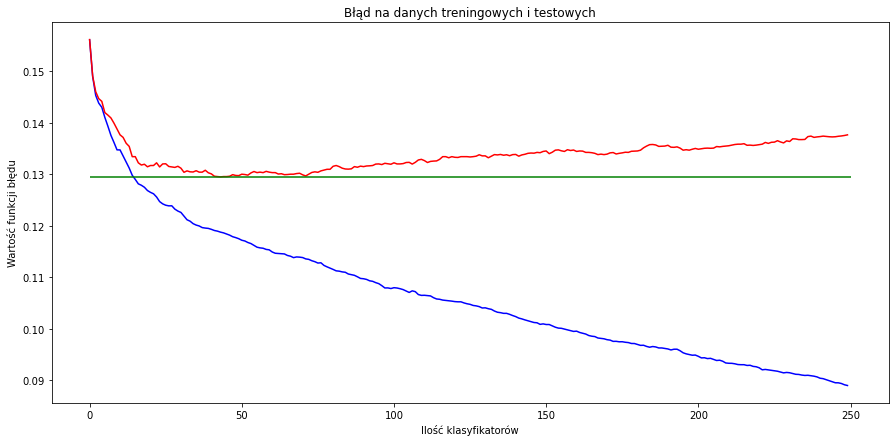

In [16]:
plt.figure(figsize=(15, 7))
plt.title("Błąd na danych treningowych i testowych")
plt.plot(cv_results["train-error-mean"], color="b")
plt.plot(cv_results["test-error-mean"], color="r")
# plt.ylim((0., 0.2))
plt.hlines([cv_results["test-error-mean"].min()], xmin=0, xmax=250, color="g")
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość funkcji błędu")

Text(0, 0.5, 'Wartość auc')

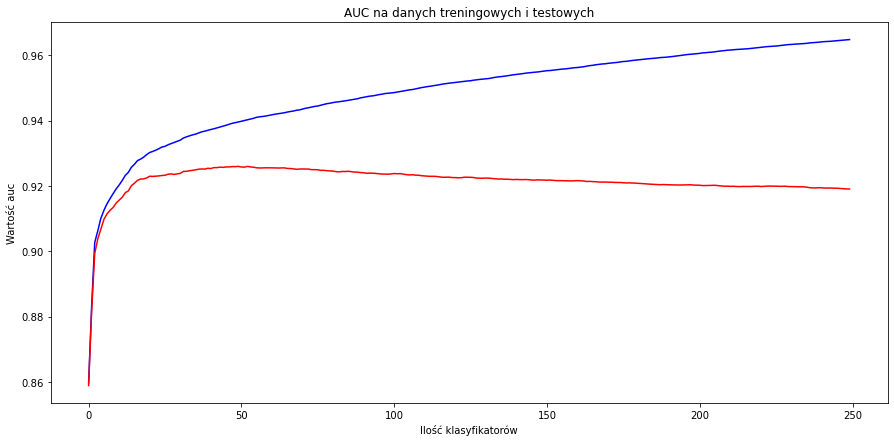

In [17]:
plt.figure(figsize=(15, 7))
plt.title("AUC na danych treningowych i testowych")
plt.plot(cv_results["train-auc-mean"], color="b")
plt.plot(cv_results["test-auc-mean"], color="r")
# plt.ylim((0., 0.2))
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość auc")

In [18]:
# Spróbujmy użyć klasycznego model_selection - czy wyniki są mniej więcej zgodne?

import sklearn.model_selection as msel

# .score() - accuracy

clf = xgb.XGBClassifier(objective="reg:logistic", max_depth=3, 
                        learning_rate=0.8, n_estimators=5)
msel.cross_val_score(clf, x, y, cv=4, n_jobs=-1)

array([0.85530033, 0.8527027 , 0.86007371, 0.85884521])

Model selection ocenia dokładność, podczas gdy xgb.cv ocenia błąd. Błąd = 1 - dokładność.

In [19]:
# results show
print("cv_Results: ", cv_results.iloc[-1])

cv_Results:  train-error-mean    0.088961
train-error-std     0.001307
train-auc-mean      0.964766
train-auc-std       0.000743
test-error-mean     0.137680
test-error-std      0.002125
test-auc-mean       0.919046
test-auc-std        0.002407
Name: 249, dtype: float64


h. przedstawienie accuracy oraz auc

In [20]:
#accuracy/average out-of-sample accuracy
print("acc: ", ((1- cv_results["test-error-mean"]).iloc[-1]))

acc:  0.8623199802799975


### Zadanie 3

Zmodyfikuj kod powyżej tak, aby wykorzystywać sposób w jaki powinno się robić crosswalidację: użyj zestawu treningowego do walidacji (zostanie on wewnętrznie podzielony na zestaw treningowy i walidacyjny) oraz małego zestawu testowego do oceny dokładności wybranego najlepszego modelu.

Uzasadnienie: taką crosswalidację będziemy chcieli wykonać wielokrotnie w ramach poszukiwania parametrów. Zachowajmy zestaw testowy do oceny ostatecznego rozwiązania.

Wykorzystaj metody poznane wcześniej na kursie.

Spróbujmy trzech kombinacji parametrów.

In [ ]:
# 0. Podział na trening_valid, test -- mozna uzyc DMarix
# 1. Trening na kilku wariantach i ocena (CV)  [max_depth=2,3,4, learning_rate= 0.5]
# 2. Na najlepszym modelu, trening na trening_valid a test na test

In [ ]:
#mozna zmniejszyc num_boost_round do 100

In [22]:
from sklearn.model_selection import train_test_split
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x, y, test_size=0.2)

data_dm = xgb.DMatrix(data=train_valid_x.values, label=train_valid_y)

In [ ]:
params = {
    "objective": "reg:logistic", 
    "booster": "gbtree",
    "learning_rate": 0.5  # DEFAULT: 0.3
}

In [23]:
for max_depth in [2, 3, 4]:
    my_params = {"max_depth": max_depth}
    my_params.update(params)
    cv_results = xgb.cv(
        dtrain=data_dm, 
        params=my_params, 
        nfold=4, 
        num_boost_round=100, metrics=["error"], as_pandas=True)
    best_rounds = cv_results["test-error-mean"].argmin()
    score = cv_results["test-error-mean"].min()
    print("For max_depth {} the best result was {} after {} rounds".format(
        max_depth, score, best_rounds
    ))

For max_depth 2 the best result was 0.1279176904176904 after 69 rounds
For max_depth 3 the best result was 0.1279176904176904 after 69 rounds
For max_depth 4 the best result was 0.1279176904176904 after 69 rounds


In [24]:
from sklearn.metrics import roc_auc_score, f1_score

my_params = {"max_depth": 3, "n_estimators": 69}
my_params.update(params)

best_model = xgb.XGBClassifier(**my_params)
best_model.fit(train_valid_x, train_valid_y)

preds = best_model.predict(test_x)
probas = best_model.predict_proba(test_x)[:, 1]

roc_auc_score(test_y, probas), f1_score(test_y, preds)

(0.9269704913145217, 0.7036906854130053)

In [25]:
best_model.score(test_x, test_y) #acc

0.8705665591893137